In [ ]:
#SVM draws a hyper place in n dimensional space such that it maximizes margin between classificartion groups

#SVM is a supervised learning algorithm used for classification and regression analysis
#It is a non-probabilistic binary linear classifier
#It works by finding the hyperplane that best divides a dataset into two classes
#The hyperplane is chosen to maximize the margin between the two classes, which is the distance between the hyperplane and the nearest data point from either class 
#The data points that are closest to the hyperplane are called support vectors, and they are the most important points in determining the position of the hyperplane
#SVM can be used for both linear and non-linear classification problems
#In the case of non-linear classification, SVM uses a kernel trick to transform the data into a higher-dimensional space where it can be separated by a hyperplane
#Commonly used kernels include linear, polynomial, and radial basis function (RBF) kernels
#SVM is a powerful algorithm that can handle high-dimensional data and is less prone to overfitting than other algorithms, such as decision trees or neural networks
#It is widely used in various applications, including image recognition, text classification, and bioinformatics

In [ ]:
#what are regularization and its techniques?
#Regularization is a technique used in machine learning to prevent overfitting by adding a penalty term to the loss function
#The penalty term discourages the model from fitting the training data too closely, which can lead to poor generalization on unseen data


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\uciml\iris\versions\2


In [ ]:
import pandas as pd
from sklearn import datasets 
from sklearn import svm
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
import sys
import matplotlib.pyplot as plt 
import seaborn as sns




In [ ]:
kaggle_path = path
print("Kaggle Path:", kaggle_path)

Kaggle Path: C:\Users\HP\.cache\kagglehub\datasets\uciml\iris\versions\2


In [ ]:
# Load the dataset into a pandas DataFrame
iris_data_path = os.path.join(kaggle_path, "Iris.csv")
iris_df = pd.read_csv(iris_data_path)

# Display the first few rows of the dataset
print(iris_df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_df = iris_df.drop(columns=['Id'])
iris_df['Species'] = iris_df['Species'].astype('category').cat.codes
iris_df['Species'] = iris_df['Species'].astype('category').cat.codes
iris_df['Species'] = iris_df['Species'].astype('category').cat.codes

In [ ]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df.duplicated().sum()

3

In [ ]:
iris_df.__dataframe__


<bound method DataFrame.__dataframe__ of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]>

In [ ]:
iris_df= iris_df.drop_duplicates()
iris_df.duplicated().sum()

0

In [ ]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
(iris_df == 0).sum()

SepalLengthCm     0
SepalWidthCm      0
PetalLengthCm     0
PetalWidthCm      0
Species          48
dtype: int64

In [ ]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

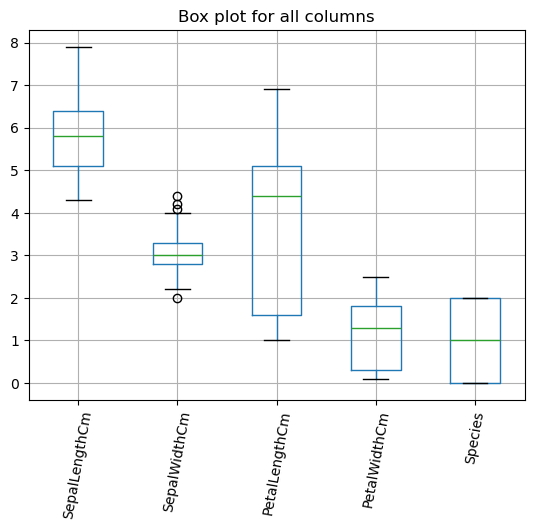

In [ ]:
iris_df.boxplot()
plt.title('Box plot for all columns')
plt.xticks(rotation=80)
plt.show()

In [ ]:
lower_limit=np.percentile(iris_df['SepalWidthCm'],5)
upper_limit=np.percentile(iris_df['SepalWidthCm'],95)
iris_df['SepalWidthCm']=np.clip(iris_df['SepalWidthCm'],lower_limit,upper_limit)

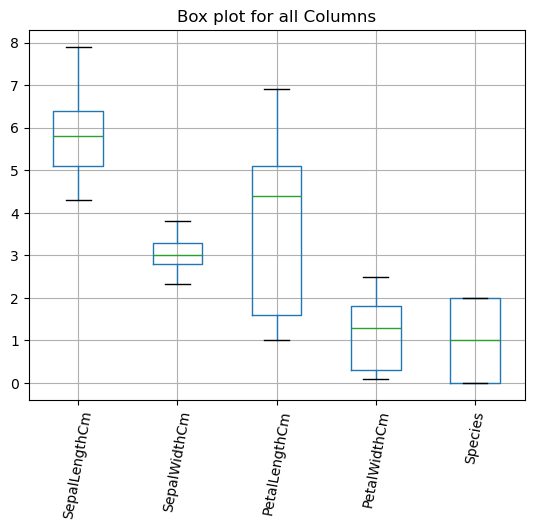

In [ ]:
iris_df.boxplot()
plt.title('Box plot for all Columns')
plt.xticks(rotation=80)
plt.show()

In [ ]:
x=iris_df.iloc[:,:-1]
y=iris_df.iloc[:,-1:]

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y_scaled=labelencoder.fit_transform(y)


In [ ]:
y=pd.DataFrame(y_scaled,columns=y.columns)
y.head()
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
142,2
143,2
144,2
145,2


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 1, 2, 0, 0, 2], dtype=int64)

In [ ]:
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy For Built In Model Is: {accuracy*100:0.2f}%')


Accuracy For Built In Model Is: 93.33%


In [ ]:
def summarize_by_class(x, y):
    summaries = {}
    classes = np.unique(y)
    for c in classes:
        X_c = x[y == c]
        mean = np.mean(X_c, axis=0)
        var = np.var(X_c, axis=0)
        prior = X_c.shape[0] / x.shape[0]
        summaries[c] = (mean, var, prior)
    return summaries

In [ ]:
def gaussian_probability(x, mean, var):
    eps = 1e-6 
    exponent = np.exp(- ((x - mean) ** 2) / (2 * var + eps))
    return (1 / np.sqrt(2 * np.pi * var + eps)) * exponent


In [ ]:
def calculate_posteriors(summaries, x):
    posteriors = {}
    for c, (mean, var, prior) in summaries.items():
        likelihood = gaussian_probability(x, mean, var)
        total_likelihood = np.sum(np.log(likelihood))
        posterior = np.log(prior) + total_likelihood
        posteriors[c] = posterior
    return posteriors

In [ ]:
def predict_one(summaries, x):
    posteriors = calculate_posteriors(summaries, x)
    return max(posteriors, key=posteriors.get)
    
def predict(X, summaries):
    return np.array([predict_one(summaries, x) for x in X])


In [ ]:
# Define a mapping for species names
target_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Add a new column 'flower_name' using the mapping
iris_df['flower_name'] = iris_df['Species'].map(target_names)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,flower_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [ ]:
X_train = x_train.to_numpy().astype(float)
X_test = x_test.to_numpy().astype(float)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

summaries = summarize_by_class(X_train, y_train)
y_pred = predict(X_test, summaries)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 93.33%


In [ ]:
# Train an SVM model
svm_model = svm.SVC(kernel='linear', C=1.0, random_state=11)
svm_model.fit(X_train, y_train)

# Predict using the SVM model
svm_y_pred = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Model Accuracy: {svm_accuracy * 100:.2f}%")

SVM Model Accuracy: 96.67%


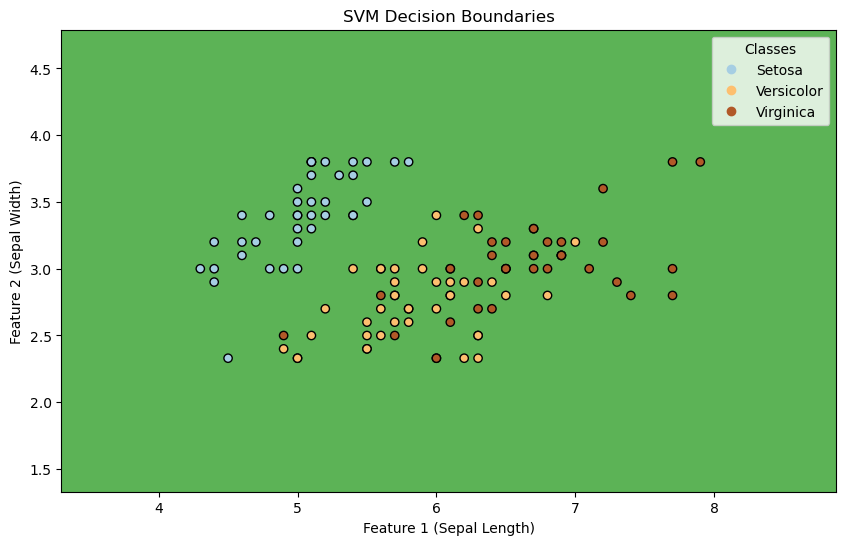

In [ ]:
# Create a mesh grid for plotting decision boundaries
h = 0.02  # step size in the mesh

X_train_2d = X_train[:, :2] 
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.legend(handles=scatter.legend_elements()[0], labels=target_names.values(), title="Classes")

plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.title('SVM Decision Boundaries')
plt.show() 


# SVM 


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = iris_df.drop(['Species', 'flower_name'], axis='columns')
y = iris_df['Species']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
len(x_train)

117

In [ ]:
len(x_test)

30

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(x_train, y_train)

SVC()

In [ ]:
model.score(x_test, y_test)

0.9666666666666667

In [ ]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0], dtype=int8)

In [ ]:
#hyperparameter tuning
model = SVC(gamma = 1)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9666666666666667

In [ ]:
model = SVC(C=10) # C IS REGULARIZATION PARAMETER
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9666666666666667